In [73]:
# import statistical tools
import numpy as np
import pandas as pd
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [75]:
# import data visualisation tools
import matplotlib.pyplot as plt
import seaborn as sns

In [76]:
# load and visualise data
url = "/Users/arpanganguli/Documents/Finance/ISLR/Datasets/Boston.csv"
Boston = pd.read_csv(url, index_col = 'SlNo')
Boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
SlNo,,,,,,,,,,,,,,
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


<Figure size 1800x720 with 0 Axes>

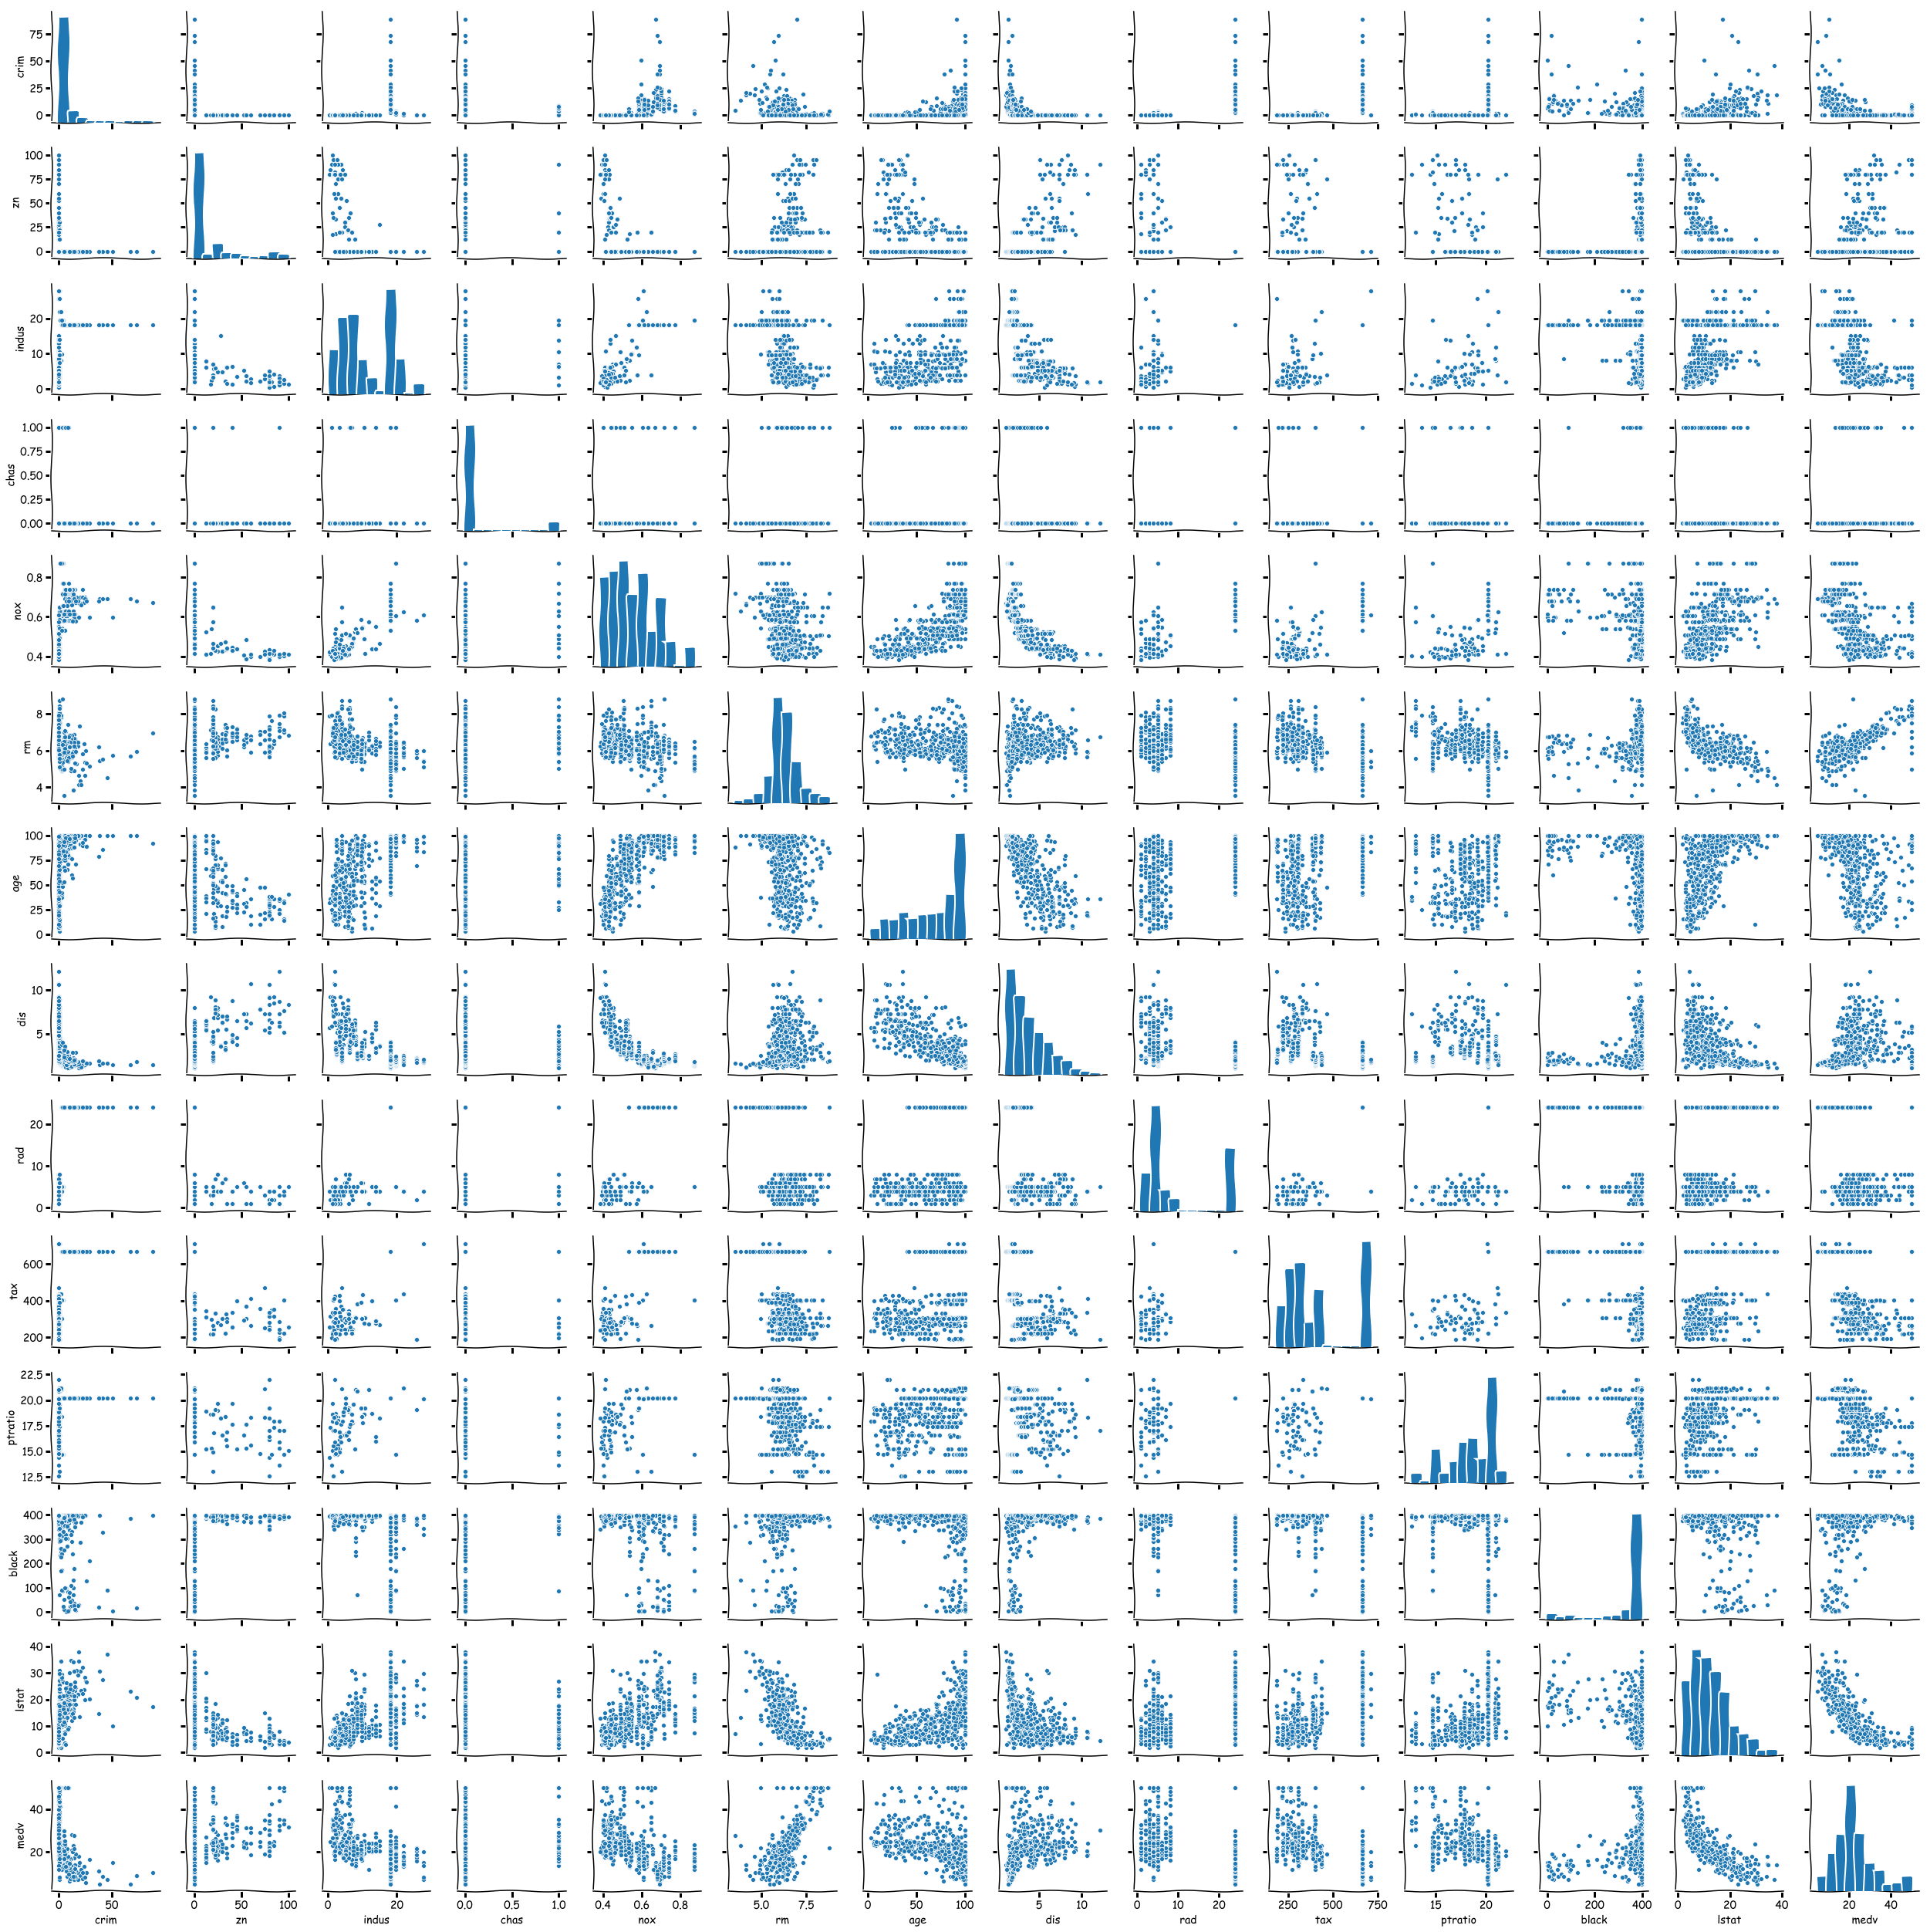

In [77]:
plt.xkcd()
plt.figure(figsize = (25, 10))
sns.pairplot(Boston)
plt.show()

In [78]:
# perform regression
Y = Boston['medv']
X1 = Boston['crim']
X2 = Boston['zn']
X3 = Boston['indus']
X4 = Boston['chas']
X5 = Boston['nox']
X6 = Boston['rm']
X7 = Boston['age']
X8 = Boston['dis']
X9 = Boston['rad']
X10 = Boston['tax']
X11 = Boston['ptratio']
X12 = Boston['black']
X13 = Boston['lstat']

model = ols("Y~X1+X2+X3+X4+X5+X6+X7+X8+X9+X10+X11+X12+X13", data = Boston).fit()

In [79]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Wed, 09 Jan 2019   Prob (F-statistic):          6.72e-135
Time:                        20:51:26   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4595      5.103      7.144      0.000      26.432      46.487
X1            -0.1080      0.033     -3.287      0.001      -0.173      -0.043
X2             0.0464      0.014      3.382      0.001       0.019       0.073
X3             0.0206      0.061      0.334      0.738      -0.100       0.141
X4             2.6867      0.862      3.118      0.002       0.994       4.380
X5           -17.7666      3.820     -4.651      0.000     -25.272     -10.262
X6             3.8099      0.418      9.116      0.000       2.989       4.631
X7             0.0007      0.013      0.052      0.958      -0.025       0.027
X8            -1.4756      0.199     -7.398      0.000      -1.867      -1.084
X9             0.3060      0.066      4.613      0.000       0.176       0.436
X10           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
X11           -0.9527      0.131     -7.283      0.000      -1.210      -0.696
X12            0.0093      0.003      3.467      0.001       0.004       0.015
X13           -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [80]:
# calculate and display variance inflation factor
Bostondf = pd.concat([X1, X2, X3, X4, X5, X6, X7, X8, \
X9, X10, X11, X12, X13], axis = 1)
vif = pd.DataFrame()
vif["Variance Inflation Factor"] = [variance_inflation_factor(Bostondf.values, i)\
for i in range(Bostondf.shape[1])]
vif["Features"] = Bostondf.columns
vif["Variance Inflation Factor"]

0      2.100373
1      2.844013
2     14.485758
3      1.152952
4     73.894947
5     77.948283
6     21.386850
7     14.699652
8     15.167725
9     61.227274
10    85.029547
11    20.104943
12    11.102025
Name: Variance Inflation Factor, dtype: float64

In [81]:
vif["Features"]

0        crim
1          zn
2       indus
3        chas
4         nox
5          rm
6         age
7         dis
8         rad
9         tax
10    ptratio
11      black
12      lstat
Name: Features, dtype: object